# 4.2. Profiling your code easily with cProfile and IPython

In [1]:
import numpy as np

In [2]:
def step(*shape):
    # Create a random n-vector with +1 or -1 values.
    return 2 * (np.random.random_sample(shape)<.5) - 1

In [3]:
%%prun -s cumulative -q -l 10 -T prun0
# We profile the cell, sort the report by "cumulative
# time", limit it to 10 lines, and save it to a file
# named "prun0".

n = 10000
iterations = 50
x = np.cumsum(step(iterations, n), axis=0)
bins = np.arange(-30, 30, 1)
y = np.vstack([np.histogram(x[i,:], bins)[0]
               for i in range(iterations)])

*** Profile printout saved to text file 'prun0'.


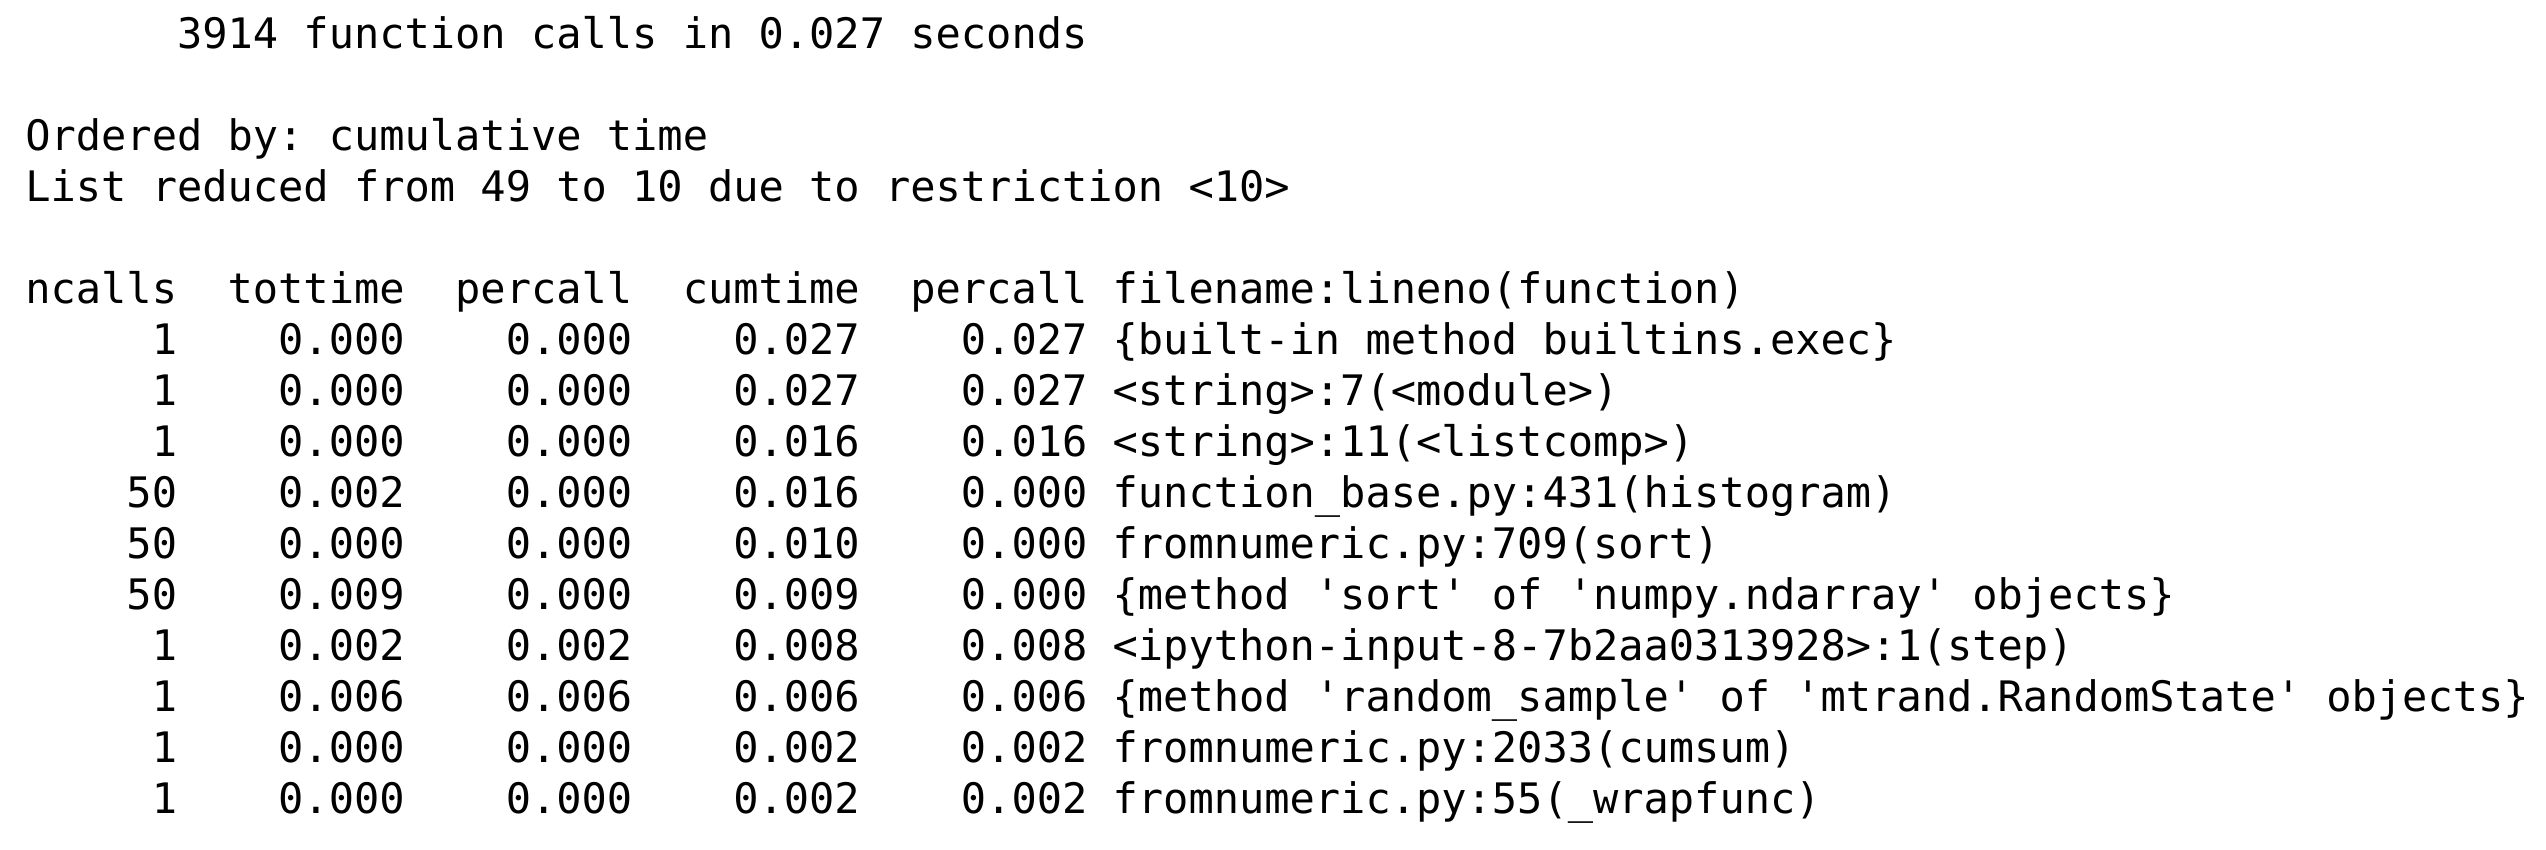

In [4]:
print(open('prun0', 'r').read())

```bash
$ python -m cProfile -o profresults myscript.py
```

```
import pstats
p = pstats.Stats('profresults')
p.strip_dirs().sort_stats("cumulative").print_stats()
```